# Bank Loan Status (Part I)

The Dataset we will be working with has been downloaded from Kaggle. As for the source of this set is currently unkonwn, I will try my best to get some sense and describe the features of this dataset.

The data is already split into train & test sets in 2 seperate csv files

From the initial look at the Train & Test dataset we can deduce that it is for credit information per customer and consisting of 19 attributes of 203,514 customers.

### Features:

- Loan ID: Unique ID for each loan
- Customer ID: Unique ID for each customer
- Loan Status: Status of the loan (Fully Paid / Charges off)
- Current Loan Amount: Loan value
- Term: Term class (Short Term / Long Term)
- Credit Score: The credit score per customer
- Annual Income: Annual inncom per customer
- Years in current job: Time active at their current job(years)
- Home Ownership: Ownership Classification (Home Mortgage / Own Home / Rent / Have Mortgage)
- Purpose: Purpose for the loan (Home Improvements/Debt Consolidation/Buy House/)
- Monthly Debt: The amount each customer owes per month
- Years of Credit History: Number of years the customer had credit history
- Months since last delinquent: Number of months since last failed to meet the minimum payment
- Number of Open Accounts: Number of accounts open per customer
- Number of Credit Problems: Number of problems of credit per customer
- Current Credit Balance: Current credit balance per customer
- Maximum Open Credit: Available open credit per customer 
- Bankruptcies: Number of times customer declared bankruptcies 
- Tax Liens: A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes




## Methodology Approach

My approach will be as follows:

1. Initially view the data and see what it's all about and try to identify missing values and how will fix it.
2. Preprocess both traing and test datasets.
3. Once all the data is clean build and compare Machine Learning models to predict Months since last delinquent and Bankruptcy.
4. Analyze the data and use visualizations (via Tableau) to gather insights and prepare final conclusions and presentation.

## Preprocessing (Train Dataset)

In this part of the project I will be focusing on cleaning up the data in both train and test sets.

In [1]:
# Importing Initial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Using this to ignore those red text blobs of warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initial look at the Train dataset
df_train = pd.read_csv('credit_train.csv')
display(df_train.shape)
display(df_train.head())

(100514, 19)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
# Checking if there is entire rows with all missing values
display(df_train.shape)
display(df_train.dropna(how='all').shape)

(100514, 19)

(100000, 19)

In [5]:
# Dropping all the rows that contain null values in all the columns
df_train.dropna(how='all', inplace=True)

In [6]:
# Getting first statiscal insights about the train dataset
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


From the initial look there are some outliers:
- Credit Score has max value of 7510 which is an obvious outlier, since the max should be 900.
 and it looks like the entire record is multiplied by 10.

In [7]:
from functions import missing_values_table
missing_values_table(df_train)

Your selected dataframe has 19 columns.
Your selected dataframe has 100000 rows.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


#### How to Deal with the Missing Values:

- Months since last delinquent:
    - Will use Regression to predict the missing values
    or
    - Can assume that clients with high income, credit score and years in current job didn't miss a payment, so therefore could replace with '0'.   
- Credit Score:
    - After fixing the outlier will replace with median average.
- Annual Income:
    - Will replace the mean average.
- Years in current job:
    - Will replace with the mean average.
- Bankruptcies, Tax Liens & Maximum Open Credit:
    - Since the count of missing values in these columns are relatively small I will just drop these records.

In [8]:
# For demonstration purpose only!
missing_values_table(df_train).to_excel('missing_values.xlsx',sheet_name = 'sheet1')

Your selected dataframe has 19 columns.
Your selected dataframe has 100000 rows.
There are 7 columns that have missing values.


In [9]:
# Fixing the outlier in Credit Score
df_train['Credit Score'] = np.where(df_train['Credit Score']>900, 
                                     df_train['Credit Score']/10,
                                     df_train['Credit Score'])

In [10]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [11]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [12]:
df_train['Annual Income'].fillna(df_train['Annual Income'].mean(), inplace=True)

In [13]:
df_train['Credit Score'].fillna(df_train['Credit Score'].median(), inplace=True)

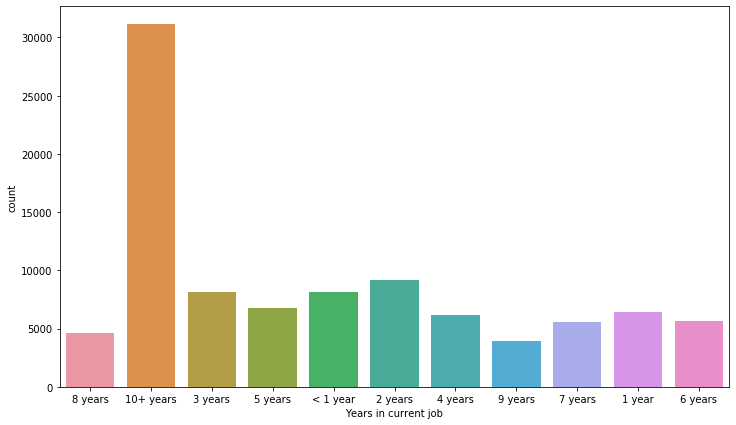

In [14]:
# since Years in current job is as we can see is a string then we could not just fill with the mean
# Therefore i will plot this column to see the count of these values
plt.figure(figsize=(12,7))
sns.countplot(df_train['Years in current job']);

In [15]:
# Since '10+ years' has the most count i will use it to fill in the missing values
df_train['Years in current job'].fillna('10+ years', inplace=True)

In [16]:
# Re-checking again where are the missing values
missing_values_table(df_train)

Your selected dataframe has 19 columns.
Your selected dataframe has 100000 rows.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [17]:
# droping the rows that contain null values for the following columns:
df_train.dropna(subset=['Bankruptcies'], how='any', inplace=True)
df_train.dropna(subset=['Tax Liens'], how='any', inplace=True)
df_train.dropna(subset=['Maximum Open Credit'], how='any', inplace=True)

In [18]:
# Final check for missing values in the train set
missing_values_table(df_train)

Your selected dataframe has 19 columns.
Your selected dataframe has 99794 rows.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53140,53.2


In [19]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,722.0,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,722.0,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [20]:
# To view all the features (Columns)
pd.set_option('display.max_columns', None)

In [21]:
# Converting the features containg strings to binary before splitting and fitting in our model.

encoded_df_train = df_train.copy()

encode_list = ['Loan Status', 'Term', 'Purpose', 'Home Ownership', 'Years in current job']

encoded_columns = pd.get_dummies(encoded_df_train[encode_list])
encoded_df_train.drop(encode_list, axis = 1, inplace = True)

encoded_df_train = encoded_df_train.merge(encoded_columns, left_index = True, right_index = True)
encoded_df_train

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,709.0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,721.0,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,722.0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,147070.0,725.0,4.754370e+05,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,99999999.0,732.0,1.289416e+06,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,103136.0,742.0,1.150545e+06,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,530332.0,746.0,1.717524e+06,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [22]:
# The Loan & Customer IDs are not needed for our model
encoded_df_train.drop(columns=['Loan ID','Customer ID'], inplace=True)

In [23]:
encoded_df_train.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [24]:
encoded_df_train.shape

(99794, 47)

In [25]:
# Assigning all the rows with null values in 'Months since last delinquent' to a sepearte variable
# This is what i want to predict
prediction = encoded_df_train.loc[encoded_df_train['Months since last delinquent'].isnull()].copy()

In [26]:
prediction

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,206602.0,729.0,8.968570e+05,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,215952.0,739.0,1.454735e+06,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,244266.0,714.0,1.619047e+06,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
99992,48796.0,722.0,1.378277e+06,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
99995,147070.0,725.0,4.754370e+05,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
99998,530332.0,746.0,1.717524e+06,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [27]:
# This is the data that i will train my model on
training_df = encoded_df_train.loc[~encoded_df_train['Months since last delinquent'].isnull()].copy()

In [28]:
training_df.shape

(46654, 47)

In [29]:
training_df

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,217646.0,730.0,1.184194e+06,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,648714.0,722.0,1.378277e+06,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8,548746.0,678.0,2.559110e+06,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,99999999.0,742.0,1.190046e+06,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
99993,44484.0,717.0,1.152426e+06,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
99994,210584.0,719.0,7.833890e+05,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,99999999.0,732.0,1.289416e+06,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


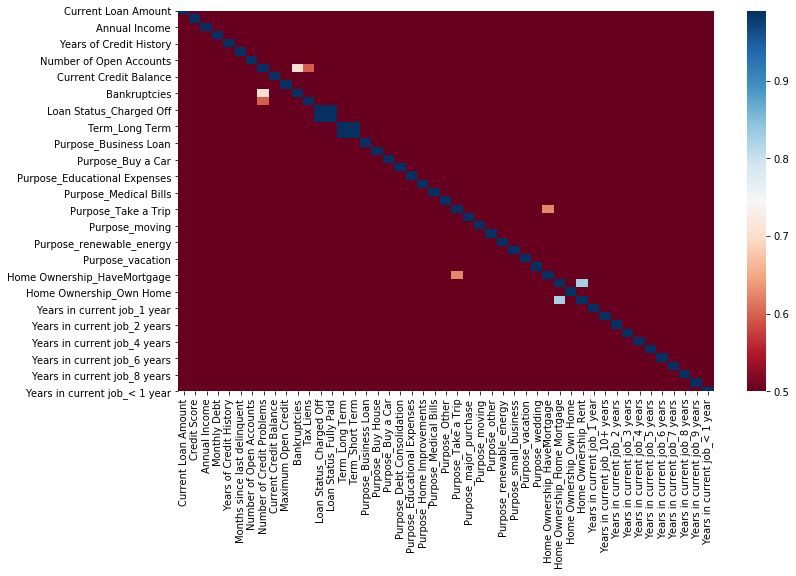

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(abs(training_df.corr()), vmin=0.5, vmax=0.99, cmap='RdBu');

In [32]:
corr = abs(training_df.corr()['Months since last delinquent']).sort_values(ascending=False)

In [33]:
corr

Months since last delinquent      1.000000
Bankruptcies                      0.123949
Number of Credit Problems         0.103787
Annual Income                     0.071064
Monthly Debt                      0.059527
Home Ownership_Rent               0.058139
Home Ownership_Home Mortgage      0.054605
Years of Credit History           0.044034
Credit Score                      0.040237
Number of Open Accounts           0.034205
Years in current job_6 years      0.031514
Current Credit Balance            0.027862
Years in current job_10+ years    0.021762
Purpose_Debt Consolidation        0.021014
Years in current job_5 years      0.019810
Term_Short Term                   0.017447
Term_Long Term                    0.017447
Years in current job_7 years      0.016159
Years in current job_4 years      0.015960
Years in current job_1 year       0.014972
Purpose_Other                     0.014795
Purpose_Medical Bills             0.014736
Years in current job_2 years      0.013487
Loan Status

### 1st Model (Linear Regression) To predict missing values

In [34]:
# Assigning my target (y) 
# (X) is the data containing the features.
X = training_df.drop('Months since last delinquent', axis = 1).copy()
y = training_df['Months since last delinquent'].copy()

In [35]:
from sklearn.model_selection import train_test_split

# Splitiing the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler

#Scale
scaler = StandardScaler()
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Instantiating & Fitting
my_lin = LinearRegression().fit(X_train,y_train)

# Check the RMSE score
y_test_pred = my_lin.predict(X_test)
rmse_score = np.sqrt(mean_squared_error(y_test_pred, y_test))
print("The RMSE score is {:.4f}".format(rmse_score))

The RMSE score is 21.6468


In [37]:
# fitting Linear regression with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
my_lin = LinearRegression()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(my_lin, X_train, y_train, cv = 5)
print(scores)

[0.03467355 0.02941342 0.03078175 0.0320427  0.01850722]


In [38]:
# import statsmodels linear model for our regression
import statsmodels.api as sm
from statsmodels.regression import linear_model
# Adding constant for the y-intercept
X = sm.add_constant(X)

In [39]:
# Fitting my initial linear model
my_linreg = linear_model.OLS(y, X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Months since last delinquent   R-squared:                       0.030
Model:                                      OLS   Adj. R-squared:                  0.030
Method:                           Least Squares   F-statistic:                     35.67
Date:                          Sun, 08 Dec 2019   Prob (F-statistic):          1.50e-275
Time:                                  13:30:57   Log-Likelihood:            -2.0959e+05
No. Observations:                         46654   AIC:                         4.193e+05
Df Residuals:                             46612   BIC:                         4.196e+05
Df Model:                                    41                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6060      1.358      2.655      0.008       0.944       6.268
Current Loan Amount             4.526e-09   3.29e-09      1.375      0.169   -1.92e-09     1.1e-08
Credit Score                       0.0441      0.004      9.960      0.000       0.035       0.053
Annual Income                  -1.358e-06   1.42e-07     -9.564      0.000   -1.64e-06   -1.08e-06
Monthly Debt                   -2.784e-05    1.1e-05     -2.527      0.012   -4.94e-05   -6.24e-06
Years of Credit History           -0.1161      0.015     -7.499      0.000      -0.146      -0.086
Number of Open Accounts           -0.0859      0.022     -3.901      0.000      -0.129      -0.043
Number of Credit Problems          2.9900      0.452      6.608      0.000       2.103       3.877
Current Credit Balance          2.009e-06   3.67e-07      5.474      0.000    1.29e-06    2.73e-06
Maximum Open Credit            -1.722e-08   1.99e-08     -0.865      0.387   -5.62e-08    2.18e-08
Bankruptcies                       4.5080      0.530      8.512      0.000       3.470       5.546
Tax Liens                         -2.0837      0.575     -3.622      0.000      -3.211      -0.956
Loan Status_Charged Off            1.3707      0.691      1.984      0.047       0.016       2.725
Loan Status_Fully Paid             2.2353      0.690      3.242      0.001       0.884       3.587
Term_Long Term                     2.3372      0.639      3.658      0.000       1.085       3.589
Term_Short Term                    1.2688      0.739      1.716      0.086      -0.180       2.718
Purpose_Business Loan              0.8843      1.051      0.842      0.400      -1.175       2.944
Purpose_Buy House                 -1.1247      1.339     -0.840      0.401      -3.750       1.500
Purpose_Buy a Car                 -0.0482      1.152     -0.042      0.967      -2.306       2.209
Purpose_Debt Consolidation         0.0455      0.752      0.061      0.952      -1.427       1.518
Purpose_Educational Expenses      -2.2153      3.290     -0.673      0.501      -8.664       4.233
Purpose_Home Improvements         -0.4886      0.831     -0.588      0.556      -2.117       1.139
Purpose_Medical Bills             -2.6611      1.129     -2.356      0.018      -4.875      -0.447
Purpose_Other                     -2.1104      0.909     -2.321      0.020      -3.893      -0.328
Purpose_Take a Trip               -1.6200      1.743     -0.930      0.353      -5.035       1.795
Purpose_major_purchase            -1.8971      1.785     -1.063      0.288      -5.396       1.602
Purpose_moving                     1.7175      2.621      0.655      0.512      -3.420       6.855
Pur

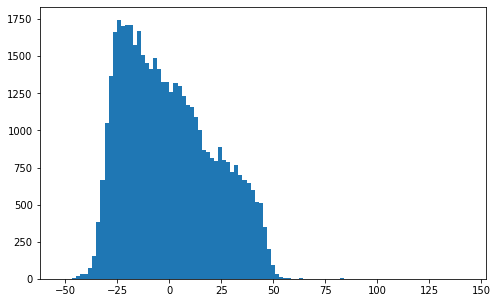

In [40]:
lin_reg_resid = my_linreg.resid
plt.figure(figsize = (8,5))
plt.hist(lin_reg_resid, bins =100)
plt.show()

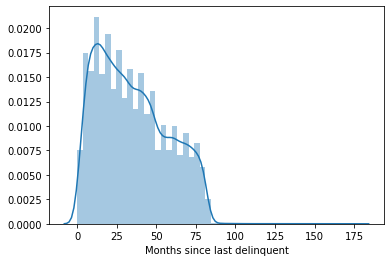

In [41]:
sns.distplot(training_df['Months since last delinquent']);

### Conclusion for the initial Linear Regression 
To conlude all the steps taken above we can safley say that this was not promissing and cannot predict the missing values with our linear reggression model as the RMSE (Root Mean Square Error) was 21.65 which describes the measure of the differences between values predicted by our model and the values actually observed.

Also if we take a look at our 5-fold cross validation score we can conclude that the scores on the validation was very low with a maximum of 3.4%.

As for the final check by OLS (ordinary least squares) which is linear least squares method for estimating the unknown parameters in a linear regression model had a r-squared value of 0.03 with alot of the feature's p-value way above the threshold of 0.05, and by getting the corrolation between our target and our features i found that only 2 features with a corrolation value of ~ 0.12 and 0.1 which would be not enough to explain the variance in our data to properly predict the missing values in our target column.

### 2nd Model (Random Forrest) to predict missing values

In [42]:
encoded_df_train.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [43]:
notnans = encoded_df_train.notnull().all(axis=1)

In [44]:
df_notnans = encoded_df_train[notnans]

In [45]:
df_notnans.drop(columns='Months since last delinquent', inplace=True)

In [46]:
df_nans = encoded_df_train.loc[~notnans].copy()
df_nans.drop(columns='Months since last delinquent', inplace=True)

In [47]:
df_nans

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,206602.0,729.0,8.968570e+05,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,215952.0,739.0,1.454735e+06,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,244266.0,714.0,1.619047e+06,4290.39,21.4,5.0,1.0,132012.0,242660.0,1.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
99992,48796.0,722.0,1.378277e+06,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
99995,147070.0,725.0,4.754370e+05,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
99998,530332.0,746.0,1.717524e+06,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans,y, train_size=0.75)

# Scale the data
from sklearn.preprocessing import StandardScaler

#Scale
scaler = StandardScaler()
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Instantiate
model_reg = RandomForestRegressor(n_estimators=500, max_depth=50, n_jobs=-1)

# Fit on the train data
model_reg.fit(X_train_scaled, y_train)

# Check the prediction score
score = model_reg.score(X_test_scaled, y_test)

# Check the RMSE score
y_test_pred2 = model_reg.predict(X_test_scaled)
rmse_score2 = np.sqrt(mean_squared_error(y_test_pred2, y_test))


print("The RMSE score is {:.4f}".format(rmse_score2))

The RMSE score is 19.1987


In [49]:
# fitting Random Forrest regression with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
my_model = RandomForestRegressor()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(my_model, X_train_scaled, y_train, cv = 5)
print(scores)

[0.09128293 0.09693681 0.10290083 0.08741809 0.09018634]


In [50]:
# To compare after filling the null values with the predicted
print('The Mean of Target =',encoded_df_train['Months since last delinquent'].mean())
print('The Median of Target =',encoded_df_train['Months since last delinquent'].median())
print('The Variance of Target =',encoded_df_train['Months since last delinquent'].var())
print('The Min Value of Target =',encoded_df_train['Months since last delinquent'].min())
print('The Max Value of Target =',encoded_df_train['Months since last delinquent'].max())

The Mean of Target = 34.98859690487418
The Median of Target = 32.0
The Variance of Target = 481.9650597722125
The Min Value of Target = 0.0
The Max Value of Target = 176.0


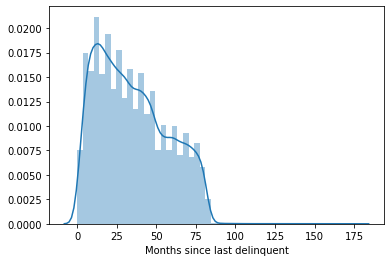

In [51]:
# Plotting the distribution of the target column without the null values
sns.distplot(encoded_df_train['Months since last delinquent'].dropna());

In [52]:
# Making sure the shape of the features are the same to predict
display(df_nans.shape)
display(df_notnans.shape)

(53140, 46)

(46654, 46)

In [53]:
# Predict the missing values
generated_pred = model_reg.predict(df_nans)
generated_pred

array([34.59 , 34.324, 34.126, ..., 33.604, 34.126, 34.45 ])

In [54]:
# Changing the type from float to integer to match the values in the target column
generated_pred = generated_pred.astype(int)
generated_pred

array([34, 34, 34, ..., 33, 34, 34])

In [55]:
# Assigning the predicted values to a column with the same name as the target
df_nans['Months since last delinquent'] = generated_pred

In [56]:
df_nans[:4]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Months since last delinquent
0,445412.0,709.0,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,34
3,347666.0,721.0,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,34
4,176220.0,722.0,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
5,206602.0,729.0,8.968570e+05,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,33


In [57]:
encoded_df_train.shape

(99794, 47)

In [58]:
encoded_df_train[:5]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [59]:
# Getting the indexes of the rows with the null value in the target column
indexes = encoded_df_train[encoded_df_train['Months since last delinquent'].isnull()].index.tolist()

In [60]:
# Filling the null values in the target column with the predicted values
encoded_df_train.loc[indexes, 'Months since last delinquent'] = generated_pred

In [61]:
# Check after filling in the missing values
missing_values_table(encoded_df_train)

Your selected dataframe has 47 columns.
Your selected dataframe has 99794 rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


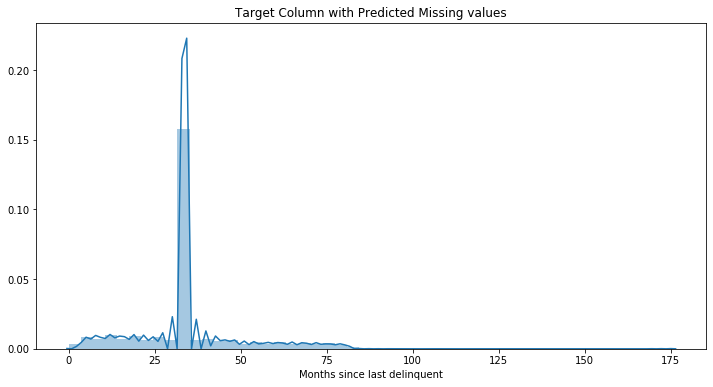

In [62]:
# Plot to see how the data in the target column is distributed after filling in the missing values
plt.figure(figsize=(12, 6))
sns.distplot(encoded_df_train['Months since last delinquent'])
plt.title('Target Column with Predicted Missing values');

In [63]:
encoded_df_train

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,445412.0,709.0,1.167493e+06,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,262328.0,722.0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,347666.0,721.0,8.069490e+05,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,176220.0,722.0,1.378277e+06,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.0,4.754370e+05,2202.86,22.3,33.0,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
99996,99999999.0,732.0,1.289416e+06,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
99997,103136.0,742.0,1.150545e+06,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
99998,530332.0,746.0,1.717524e+06,9890.07,15.0,34.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [64]:
print('The Mean of Target with predicted values =',encoded_df_train['Months since last delinquent'].mean())
print('The Median of Target with predicted values =',encoded_df_train['Months since last delinquent'].median())

The Mean of Target with predicted values = 34.355522376094754
The Median of Target with predicted values = 34.0


### Conclusion for the Random Forrest Regression

As we can see the RMSE is a little better than the linear regression with ~19.2, but the validation scores are much better with a max of 10.3%.
Also by comparison of the mean and median of the target column before and after filling in with the predicted values, we can see that there is a slight difference (mean ~0.65)(median ~2) which is normal as the target was missing 53% of its values, where i can safely say its ok since the affect was not that huge.

## Preprocessing (Test Dataset)

Now we have to perform the same for the test set

In [65]:
# Reading in the test set
df_test = pd.read_csv('credit_test.csv')
display(df_test.shape)
display(df_test.head())

(10353, 18)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [66]:
# Initial check for the missing values in the test set
missing_values_table(df_test)

Your selected dataframe has 18 columns.
Your selected dataframe has 10353 rows.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,5659,54.7
Credit Score,2334,22.5
Annual Income,2334,22.5
Years in current job,780,7.5
Bankruptcies,375,3.6
Tax Liens,354,3.4
Maximum Open Credit,353,3.4
Current Credit Balance,353,3.4
Number of Credit Problems,353,3.4
Number of Open Accounts,353,3.4


In [67]:
# Check if there is entire rows with missing values
display(df_test.shape)
display(df_test.dropna(how='all').shape)

(10353, 18)

(10000, 18)

In [68]:
# Since these rows are all null i will drop them
df_test.dropna(how='all', inplace=True)

In [69]:
missing_values_table(df_test)

Your selected dataframe has 18 columns.
Your selected dataframe has 10000 rows.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,5306,53.1
Credit Score,1981,19.8
Annual Income,1981,19.8
Years in current job,427,4.3
Bankruptcies,22,0.2
Tax Liens,1,0.0


In [70]:
# will drop the rows with missing values in Bankruptcies & Tax Liens
df_test.dropna(subset=['Bankruptcies'], how='any', inplace=True)
df_test.dropna(subset=['Tax Liens'], how='any', inplace=True)

In [71]:
missing_values_table(df_test)

Your selected dataframe has 18 columns.
Your selected dataframe has 9978 rows.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,5306,53.2
Credit Score,1978,19.8
Annual Income,1978,19.8
Years in current job,427,4.3


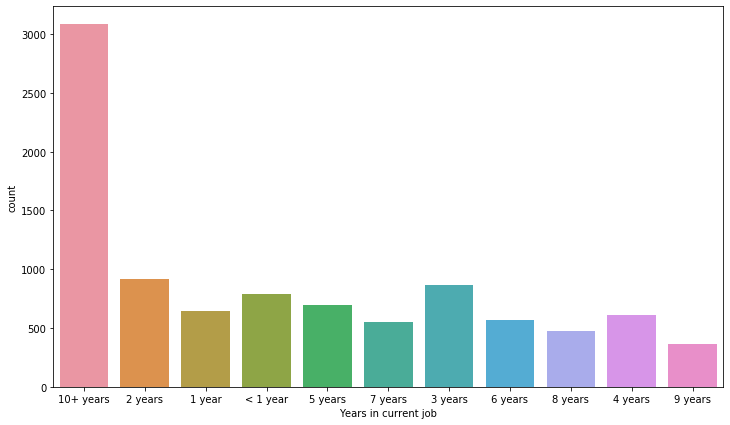

In [72]:
# since Years in current job is as we can see is a string then we could not just fill with the mean
# Therefore i will plot this column to see the count of these values
plt.figure(figsize=(12,7))
sns.countplot(df_test['Years in current job']);

In [73]:
# Since '10+ years' has the most count i will use it to fill in the missing values
df_test['Years in current job'].fillna('10+ years', inplace=True)

In [74]:
df_test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.978000e+03,8000.000000,8.000000e+03,9978.000000,9978.000000,4672.000000,9978.000000,9978.000000,9.978000e+03,9.978000e+03,9978.000000,9978.000000
mean,1.158897e+07,1078.842750,1.369940e+06,18451.958958,18.233033,35.075557,11.086390,0.165865,2.909787e+05,6.871257e+05,0.116356,0.030868
std,3.158163e+07,1479.117119,8.692091e+05,12398.368600,7.019258,21.594888,5.016296,0.501426,3.884944e+05,1.862889e+06,0.349961,0.288515
min,2.147200e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.790910e+05,706.000000,8.495138e+05,10216.347500,13.600000,17.000000,8.000000,0.000000,1.087750e+05,2.708970e+05,0.000000,0.000000
50%,3.096280e+05,725.000000,1.168386e+06,16076.850000,17.000000,32.000000,10.000000,0.000000,2.078220e+05,4.626820e+05,0.000000,0.000000
75%,5.157240e+05,741.000000,1.665174e+06,23889.650000,21.700000,50.000000,14.000000,0.000000,3.627528e+05,7.862250e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.000000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [75]:
# fix the outlier in credit score first
df_test['Credit Score'] = np.where(df_test['Credit Score']>900, 
                                     df_test['Credit Score']/10,
                                     df_test['Credit Score'])

In [76]:
df_test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.978000e+03,8000.000000,8.000000e+03,9978.000000,9978.000000,4672.000000,9978.000000,9978.000000,9.978000e+03,9.978000e+03,9978.000000,9978.000000
mean,1.158897e+07,716.624250,1.369940e+06,18451.958958,18.233033,35.075557,11.086390,0.165865,2.909787e+05,6.871257e+05,0.116356,0.030868
std,3.158163e+07,28.217992,8.692091e+05,12398.368600,7.019258,21.594888,5.016296,0.501426,3.884944e+05,1.862889e+06,0.349961,0.288515
min,2.147200e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.790910e+05,704.000000,8.495138e+05,10216.347500,13.600000,17.000000,8.000000,0.000000,1.087750e+05,2.708970e+05,0.000000,0.000000
50%,3.096280e+05,723.000000,1.168386e+06,16076.850000,17.000000,32.000000,10.000000,0.000000,2.078220e+05,4.626820e+05,0.000000,0.000000
75%,5.157240e+05,739.000000,1.665174e+06,23889.650000,21.700000,50.000000,14.000000,0.000000,3.627528e+05,7.862250e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.000000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [77]:
# Now i can fill the missing values with the mean average
df_test['Annual Income'].fillna(df_test['Annual Income'].mean(), inplace=True)
df_test['Credit Score'].fillna(df_test['Annual Income'].mean(), inplace=True)

In [78]:
missing_values_table(df_test)

Your selected dataframe has 18 columns.
Your selected dataframe has 9978 rows.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,5306,53.2


Now we are left with our target column having 53% of null values, therefore I will use the same parameters of the model I used for the train dataset to predict the missing values

In [79]:
df_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [80]:
# Converting the features containg strings to binary before splitting and fitting in our model.

encoded_df_test = df_test.copy()

encode_list = ['Term', 'Purpose', 'Home Ownership', 'Years in current job']

encoded_columns = pd.get_dummies(encoded_df_test[encode_list])
encoded_df_test.drop(encode_list, axis = 1, inplace = True)

encoded_df_test = encoded_df_test.merge(encoded_columns, left_index = True, right_index = True)
encoded_df_test

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,7.470000e+02,2.074116e+06,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,7.340000e+02,1.919190e+06,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,7.090000e+02,8.711120e+05,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,7.270000e+02,7.800830e+05,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,7.440000e+02,1.761148e+06,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806.0,7.310000e+02,1.514376e+06,4795.41,12.5,NaN,9.0,0.0,87058.0,234410.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550.0,7.180000e+02,7.631920e+05,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212.0,1.369940e+06,1.369940e+06,4354.42,27.2,NaN,8.0,1.0,99636.0,568370.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999.0,7.210000e+02,9.720970e+05,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [81]:
# The Loan & Customer IDs are not needed for our model
encoded_df_test.drop(columns=['Loan ID','Customer ID'], inplace=True)

In [82]:
# Splitting the data to a set with all the null values in the target column and the one we will use to train our model
notnans_test = encoded_df_test.notnull().all(axis=1)

df_notnans_test = encoded_df_test[notnans_test]

In [83]:
# Assingning the target column
target = df_notnans_test['Months since last delinquent']

In [84]:
target.shape

(4672,)

In [85]:
df_notnans_test.drop(columns='Months since last delinquent', inplace=True)

df_nans_test = encoded_df_test.loc[~notnans_test].copy()
df_nans_test.drop(columns='Months since last delinquent', inplace=True)

In [86]:
# Since we have used the following model for the train dataset, I will use the same for the test dataset.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans_test, target, train_size=0.75)

# Scale the data
from sklearn.preprocessing import StandardScaler

#Scale
scaler = StandardScaler()
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Instantiate
model_reg_test = RandomForestRegressor(n_estimators=500, max_depth=50, n_jobs=-1)

# Fit on the train data
model_reg_test.fit(X_train_scaled, y_train)

# Check the prediction score
score = model_reg_test.score(X_test_scaled, y_test)

# Check the RMSE score
y_test_pred3 = model_reg_test.predict(X_test_scaled)
rmse_score3 = np.sqrt(mean_squared_error(y_test_pred3, y_test))


print("The RMSE score is {:.4f}".format(rmse_score3))

The RMSE score is 22.1255


In [91]:
# fitting Random Forrest regression with 5-fold cross-validation 
from sklearn.model_selection import cross_val_score

# 1. Instanitate model
my_model2 = RandomForestRegressor()

# 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores2 = cross_val_score(my_model2, X_train_scaled, y_train, cv = 5)
print(abs(scores2))

[0.05181841 0.11193413 0.10196253 0.05398414 0.15975738]


In [96]:
# Predict the missing values
generated_pred_test = model_reg_test.predict(df_nans_test)
generated_pred_test

array([42.15 , 42.15 , 42.664, ..., 42.664, 41.912, 43.018])

In [97]:
# Changing the type from float to integer to match the values in the target column
generated_pred_test = generated_pred_test.astype(int)
generated_pred_test

array([42, 42, 42, ..., 42, 41, 43])

In [98]:
# Assigning the predicted values to a column with the same name as the target
df_nans_test['Months since last delinquent'] = generated_pred_test

In [99]:
# Getting the indexes of the rows with the null value in the target column
indexes2 = encoded_df_test[encoded_df_test['Months since last delinquent'].isnull()].index.tolist()

In [100]:
# Filling the null values in the target column with the predicted values
encoded_df_test.loc[indexes2, 'Months since last delinquent'] = generated_pred_test

In [101]:
# Check after filling in the missing values
missing_values_table(encoded_df_train)

Your selected dataframe has 47 columns.
Your selected dataframe has 99794 rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


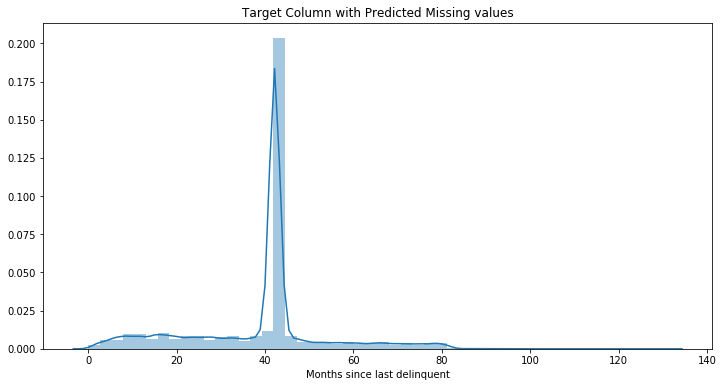

In [102]:
# Plot to see how the data in the target column is distributed after filling in the missing values
plt.figure(figsize=(12, 6))
sns.distplot(encoded_df_test['Months since last delinquent'])
plt.title('Target Column with Predicted Missing values');

In [107]:
# Saving the cleaned and encoded train & test datasets for further modelling
encoded_df_train.to_csv('encoded_df_train_clean.csv')
encoded_df_test.to_csv('encoded_df_test_clean.csv')

In [111]:
# Replacing the target with the predicted column in the original dataset
df_train['Months since last delinquent'] = encoded_df_train['Months since last delinquent']

In [117]:
# Replacing the target with the predicted column in the original dataset
df_test['Months since last delinquent'] = encoded_df_test['Months since last delinquent']

In [116]:
# This is the cleaned train dataset
df_train.to_csv('credit_train_clean.csv')

In [118]:
# This is the cleaned test dataset
df_test.to_csv('credit_test_clean.csv')

In [130]:
display(df_test.shape)
display(df_train.shape)

(9978, 18)

(99794, 18)

In [129]:
df_train.head(2)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,722.0,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [134]:
# For Data analysis purpose only!
# will combine both train and test datasets
clean_df = pd.concat([df_train,df_test], axis=0)

In [135]:
clean_df.shape

(109772, 18)

In [136]:
clean_df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,722.0,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,722.0,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [137]:
clean_df.to_csv('clean_data.csv')